# Name : Anjali Gupta 

# Task 1- Prediction using Supervised Machine Learning ( Beginner)

# GRIPMARCH23

### Problem Statement:Prediction using Supervised ML
### • Predict the percentage of a Student based on the no. of study hours. 

In [31]:
#Loading all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore')

### Read dataset and basic details of dataset
### Goal:-In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.
### In this stage we are going to read our problem dataset and have a look on it.

In [5]:
#loading training data
try:
    df = pd.read_csv('student_scores.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

Data read done successfully...


In [7]:
#check loading Data
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
#get five raws
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


After we read the data, we can look at the data using: There are only 2 variables in the dataset – Hours and Scores

In [9]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 25 rows and 2 columns


In [10]:
#Get summerization information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


with the info function will get to know that we have non null values to whole dataset and we have total 2 types of data types in dataset which is, numerical(int and float)

### Descriptive Analysis

In [11]:
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Null and Nan values

•Null Values

In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

as we notice that there are no null values in our dataset.

•Nan values

In [56]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

as we notice that there are no nan (Not a number) values in our dataset.

### Data Exploration

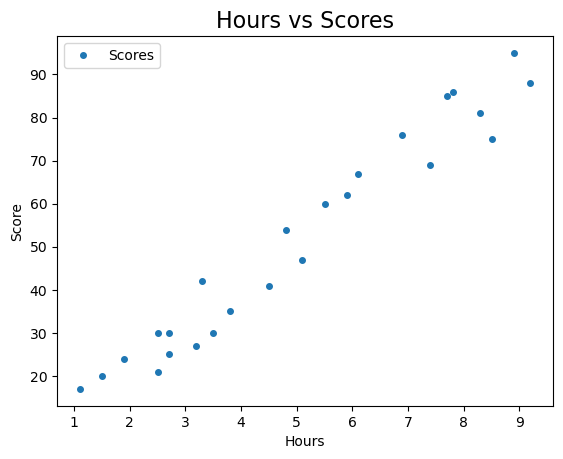

In [21]:
df.plot(x='Hours', y='Scores', style='.',markersize=8)  
plt.title('Hours vs Scores', fontsize=16)  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

We see that their is a positive linear relation between hours and the scores

### Traning and Testing

In [26]:
# Spearate target and feature column in X and y variable
X=df.iloc[:, :-1].values  
y=df.iloc[:, 1].values 

In [27]:
# Check the shape of X and y variable
X.shape, y.shape

((25, 1), (25,))

Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training and 20% goes into testing the part.

In [28]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [32]:
#Model Training
# define linear regression model object
lin_reg = LinearRegression()

In [35]:
# train or fit train dataset on linear regression model
lin_reg = lin_reg.fit(X_train, y_train)

In [48]:
# trained algorithm  to make predictions
print(X_test) 
y_pred = lin_reg.predict(X_test) 
print(y_pred)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [49]:
# Useing pandas librarie to create data frame of Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

In [50]:
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [52]:
# Get R2 score
lin_reg.score(X_train, y_train)

0.9491209376364416

In [53]:
#get Mean absolute error
print( f"Mean Absolute Error : {metrics.mean_absolute_error(y_test, y_pred)}") 

Mean Absolute Error : 3.9207511902099244


In [55]:
# prediction score
hours = [9.25]
prediction = lin_reg.predict([hours])
print(f"Predicted score is = {prediction[0]}")

Predicted score is = 92.38611528261494


Acoording to Regression Model if a student studies for 9.25 hours a day is prediction score is 92.38   